<a href="https://colab.research.google.com/github/YuriSerhiienko/data_science_hw2/blob/main/Hw2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
birth_rate_data = pd.read_html(url, match="Коефіцієнт народжуваності в регіонах України")[0]


In [6]:
#Вивести перші рядки таблиці за допомогою методу head
birth_rate_data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [7]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
birth_rate_data.shape

(28, 9)

In [8]:
#Замініть у таблиці значення "—" на значення NaN
birth_rate_data.replace('—', pd.NA, inplace=True)

In [9]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
birth_rate_data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [10]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
for col in birth_rate_data.columns[1:]:
    birth_rate_data[col] = pd.to_numeric(birth_rate_data[col], errors='coerce')

In [11]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_values_proportion = birth_rate_data.isnull().sum() / len(birth_rate_data)
print(missing_values_proportion)

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [12]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
birth_rate_data = birth_rate_data[:-1]

In [13]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
birth_rate_data.fillna(birth_rate_data.mean(), inplace=True)


<ipython-input-13-e10a6cc15009>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  birth_rate_data.fillna(birth_rate_data.mean(), inplace=True)


In [14]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_birth_rate_2019 = birth_rate_data['2019'].mean()
regions_above_average_2019 = birth_rate_data[birth_rate_data['2019'] > average_birth_rate_2019]
print(regions_above_average_2019)

               Регіон    1950   1960   1970  1990  2000  2012   2014   2019
2           Волинська  247.00  250.0  179.0   153   112   148  141.0  101.0
6        Закарпатська  314.00  273.0  207.0   168   115   151  146.0  104.0
8   Івано-Франківська  243.00  248.0  182.0   155   103   124  122.0   88.0
12          Львівська  234.00  240.0  171.0   140    91   119  119.0   87.0
14            Одеська  241.00  192.0  148.0   126    80   127  123.0   88.0
16         Рівненська  269.00  267.0  193.0   158   118   159  148.0  107.0
20         Херсонська  208.00  214.0  166.0   143    85   117  115.0   81.0
23        Чернівецька  247.00  218.0  170.0   148   101   128  129.0   92.0
25               Київ  231.04  174.0  159.0   120    73   120  121.0  110.0


In [20]:
#У якому регіоні була найвища народжуваність у 2014 році?
highest_birth_rate_2014_region = birth_rate_data["2014"].idxmax()
highest_birth_rate_2014_row = birth_rate_data.iloc[highest_birth_rate_2014_region]
print(highest_birth_rate_2014_row)


Регіон    Рівненська
1950           269.0
1960           267.0
1970           193.0
1990             158
2000             118
2012             159
2014           148.0
2019           107.0
Name: 16, dtype: object


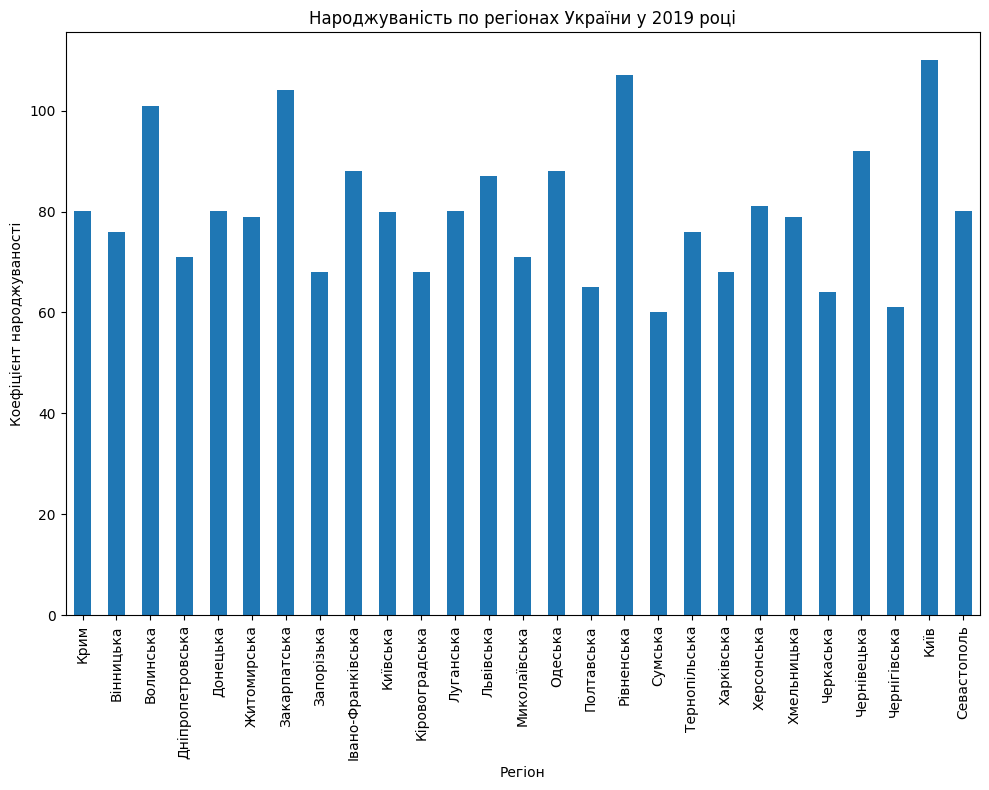

In [21]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt
birth_rate_data.set_index('Регіон', inplace=True)

plt.figure(figsize=(10, 8))
birth_rate_data["2019"].plot(kind='bar')
plt.title('Народжуваність по регіонах України у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт народжуваності')
plt.xticks(range(len(birth_rate_data.index)), birth_rate_data.index, rotation=90)
plt.tight_layout()
plt.show()


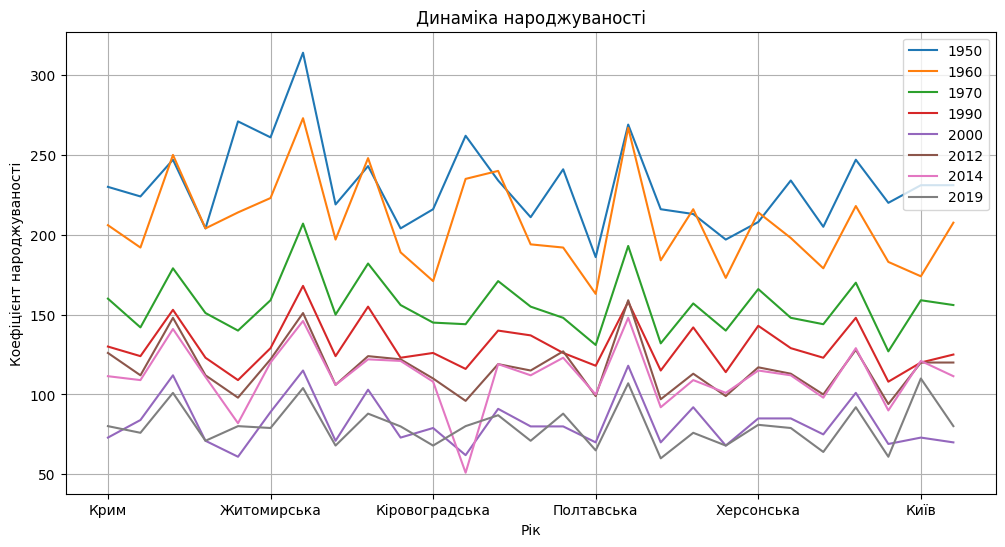

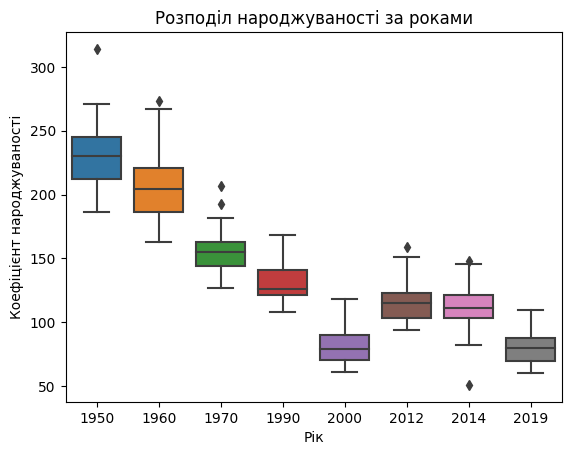

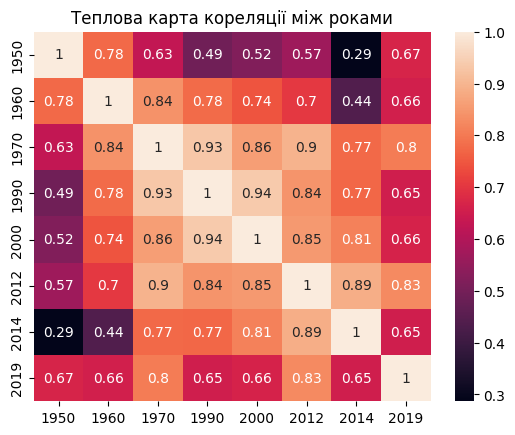

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Графік 1: Лінійний графік динаміки народжуваності
birth_rate_data.plot(kind='line', figsize=(12, 6))
plt.title('Динаміка народжуваності')
plt.xlabel('Рік')
plt.ylabel('Коефіцієнт народжуваності')
plt.grid(True)
plt.show()

# Графік 2: Боксплот розподілу народжуваності за роками
sns.boxplot(data=birth_rate_data)
plt.title('Розподіл народжуваності за роками')
plt.xlabel('Рік')
plt.ylabel('Коефіцієнт народжуваності')
plt.show()

# Графік 3: Теплова карта кореляції між роками
sns.heatmap(birth_rate_data.corr(), annot=True)
plt.title('Теплова карта кореляції між роками')
plt.show()
